In [251]:
#importing all relevant libraries
import numpy as np
import pandas as pd

# Packages for checking assumptions
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)
sns.set()
sns.set(font_scale=1.5)

# Packages for checking assumptions
from scipy import stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
import statsmodels.formula.api as sm

# Set jupyter notebook preferences
# the command below means that the output of multiple commands in a cell will be output at once.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# the command below tells jupyter to display up to 100 columns, this keeps everything visible
pd.set_option('display.max_columns', 100)
pd.set_option('expand_frame_repr', True)

# Loading train and test data files

In [252]:
path = 'C:/Meetu/Spring2019/ML/project/data/train_values/'
#path = '/Volumes/GoogleDrive/My Drive/Applied_Machine_Learning/Project/'
filename = 'train_values.csv'
df = pd.read_csv(path+filename)

In [82]:
path = 'C:/Meetu/Spring2019/ML/project/data/train_values/'
#path = '/Volumes/GoogleDrive/My Drive/Applied_Machine_Learning/Project/'
filename = 'test_values.csv'
test_df = pd.read_csv(path+filename)

In [83]:
df.head()

,row_id,process_id,object_id,phase,timestamp,pipeline,supply_flow,supply_pressure,return_temperature,return_conductivity,return_turbidity,return_flow,supply_pump,supply_pre_rinse,supply_caustic,return_caustic,supply_acid,return_acid,supply_clean_water,return_recovery_water,return_drain,object_low_level,tank_level_pre_rinse,tank_level_caustic,tank_level_acid,tank_level_clean_water,tank_temperature_pre_rinse,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_caustic,tank_lsh_acid,tank_lsh_clean_water,tank_lsh_pre_rinse,target_time_period
0,0,20001,405,pre_rinse,2018-04-15 04:20:47,L4,8550.348,0.615451,18.044704,4.990765,0.177228,15776.9100,True,True,False,False,False,False,False,False,True,True,55.499672,41.555992,44.026875,49.474102,32.385708,83.036750,73.03241,45.394646,44.340126,False,0.0,False,0.0,False
1,1,20001,405,pre_rinse,2018-04-15 04:20:49,L4,11364.294,0.654297,18.229168,3.749680,0.122975,13241.4640,True,True,False,False,False,False,False,False,True,True,55.487920,41.624170,44.045685,49.457645,32.385708,83.015045,73.03241,45.394447,44.339380,False,0.0,False,0.0,False
2,2,20001,405,pre_rinse,2018-04-15 04:20:51,L4,12174.479,0.699870,18.395544,2.783954,0.387008,10698.7850,True,True,False,False,False,False,False,False,True,True,55.476166,41.638275,44.045685,49.462350,32.385708,83.015045,73.03241,45.396280,44.336735,False,0.0,False,0.0,False
3,3,20001,405,pre_rinse,2018-04-15 04:20:53,L4,13436.776,0.761502,18.583622,1.769353,0.213397,8007.8125,True,True,False,False,False,False,False,False,True,True,55.471466,41.647675,44.048030,49.462350,32.385708,83.036750,73.03241,45.401875,44.333110,False,0.0,False,0.0,False
4,4,20001,405,pre_rinse,2018-04-15 04:20:55,L4,13776.766,0.837240,18.627026,0.904020,0.148293,6004.0510,True,True,False,False,False,False,False,False,True,True,55.459705,41.654730,44.048030,49.462350,32.385708,83.015045,73.03241,45.398197,44.334373,False,0.0,False,0.0,False


# Understanding the Data

In [84]:
df.describe()

,row_id,process_id,object_id,supply_flow,supply_pressure,return_temperature,return_conductivity,return_turbidity,return_flow,tank_level_pre_rinse,tank_level_caustic,tank_level_acid,tank_level_clean_water,tank_temperature_pre_rinse,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_acid,tank_lsh_pre_rinse
count,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5.987820e+06,5987820.0,5987820.0
mean,2.993910e+06,2.402626e+04,5.774687e+02,2.063859e+04,9.900358e-01,5.573105e+01,2.850323e+01,3.122898e+00,2.026836e+04,5.311070e+01,4.234741e+01,4.409829e+01,4.275999e+01,2.857360e+01,8.239745e+01,7.256939e+01,4.525006e+01,4.440434e+01,0.0,0.0
std,1.728535e+06,2.315437e+03,3.485798e+02,1.726843e+04,1.362277e+00,2.470911e+01,2.075043e+01,7.136347e+00,1.751884e+04,3.906756e+00,3.030825e+00,2.447630e+00,6.556844e+00,1.881273e+00,2.319812e+00,4.160146e-01,1.160742e+00,1.196753e+00,0.0,0.0
min,0.000000e+00,2.000100e+04,1.020000e+02,-9.481482e+04,-1.145833e-01,0.000000e+00,0.000000e+00,-3.616898e-01,-1.251447e+03,0.000000e+00,0.000000e+00,2.778157e+01,0.000000e+00,0.000000e+00,0.000000e+00,6.729962e+01,0.000000e+00,0.000000e+00,0.0,0.0
25%,1.496955e+06,2.203900e+04,2.170000e+02,3.770255e+03,1.041667e-02,2.916667e+01,1.671371e+00,3.291377e-01,3.602431e+03,5.067075e+01,4.086950e+01,4.269151e+01,4.067202e+01,2.715567e+01,8.226273e+01,7.238860e+01,4.513291e+01,4.428875e+01,0.0,0.0
50%,2.993910e+06,2.406300e+04,4.260000e+02,2.155671e+04,2.634549e-01,6.795790e+01,4.210025e+01,8.101852e-01,1.781684e+04,5.405147e+01,4.259277e+01,4.417264e+01,4.383880e+01,2.848669e+01,8.254485e+01,7.260200e+01,4.529131e+01,4.450996e+01,0.0,0.0
75%,4.490864e+06,2.601600e+04,9.340000e+02,3.140010e+04,1.768229e+00,7.739077e+01,4.445182e+01,1.851852e+00,3.301866e+04,5.617205e+01,4.412561e+01,4.564435e+01,4.717719e+01,2.986834e+01,8.280527e+01,7.282624e+01,4.545575e+01,4.474600e+01,0.0,0.0
max,5.987819e+06,2.798900e+04,9.770000e+02,1.031612e+05,6.194010e+00,9.697627e+01,7.356589e+01,1.009657e+02,1.031395e+05,5.834907e+01,5.135489e+01,5.244104e+01,5.063549e+01,3.778935e+01,8.352864e+01,7.399450e+01,6.146095e+01,6.524091e+01,0.0,0.0


In [97]:
df.shape

(5987820, 36)

In [98]:
#to avoid hanging the notebook, everytime I run this huge file, I have selected random data 
df = df.sample(frac=0.1)
test_df = test_df.sample(frac=0.2)

In [99]:
print(df.shape)
print(test_df.shape)


(598782, 36)
(376032, 36)


In [100]:
len(df['process_id'].unique().tolist())

5021

In [101]:
len(df['phase'].unique().tolist())

5

# Exploratory Data Analysis

In [102]:
#checking a few variables that have direct impact on final computed variable
df['return_turbidity'].describe()

count    598782.000000
mean          3.127271
std           7.151178
min          -0.318287
25%           0.329138
50%           0.806568
75%           1.855469
max         100.965710
Name: return_turbidity, dtype: float64

C:\Users\Meetu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


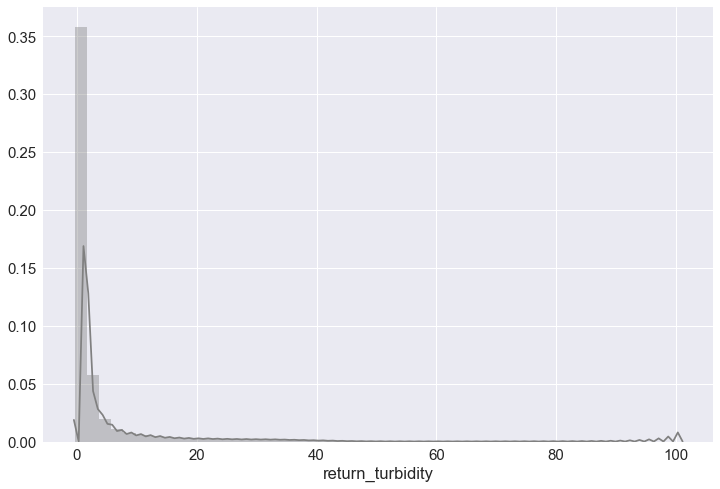

In [400]:

g = sns.distplot(df['return_turbidity'],color="gray")


In [104]:
df['return_flow'].describe()

count    598782.000000
mean      20270.737196
std       17505.129736
min       -1247.829800
25%        3602.430700
50%       17855.904000
75%       33011.430000
max      103139.480000
Name: return_flow, dtype: float64

C:\Users\Meetu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


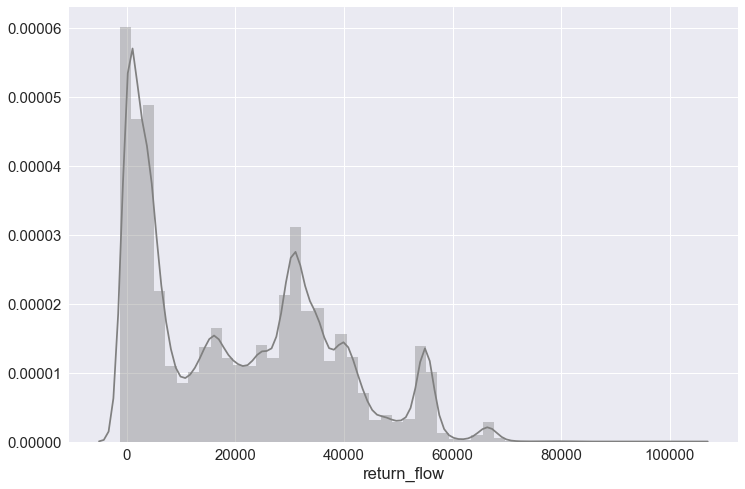

In [105]:
g = sns.distplot(df['return_flow'],color="gray")

In [106]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
target_time_period,0,0.0
tank_lsh_pre_rinse,0,0.0
return_caustic,0,0.0
supply_caustic,0,0.0
supply_pre_rinse,0,0.0
supply_pump,0,0.0
return_flow,0,0.0
return_turbidity,0,0.0
return_conductivity,0,0.0
return_temperature,0,0.0


In [107]:
df['return_turbidity']=(df['return_turbidity']-df['return_turbidity'].min())/(df['return_turbidity'].max()-df['return_turbidity'].min())

C:\Users\Meetu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


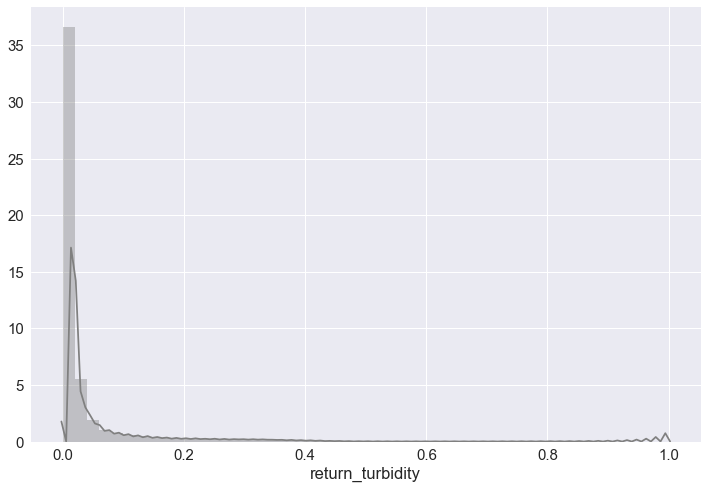

In [108]:
g = sns.distplot(df['return_turbidity'],color="gray")

def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y
helpful_sigmoid = sigmoid(df.return_turbidity)
helpful_sigmoid.describe()

In [109]:
helpful_log = np.log(df.return_turbidity + 1)
helpful_log.describe()

count    598782.000000
mean          0.031472
std           0.060505
min           0.000000
25%           0.006372
50%           0.011045
75%           0.021235
max           0.693147
Name: return_turbidity, dtype: float64

C:\Users\Meetu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


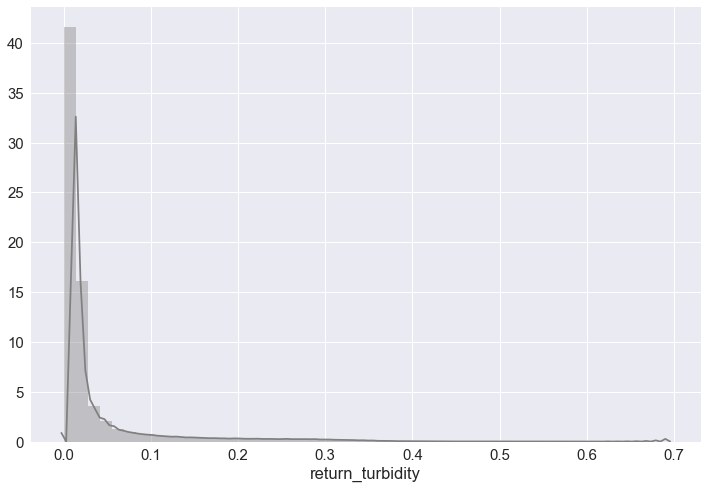

In [110]:
g = sns.distplot(helpful_log,color="gray")

# Data Cleaning and Data Preparation

In [111]:
#Steps in Data Cleaning and Data preparation
#In this step we have created dummy varaibles for 5 phases 
#converted those dummy varaibles to string datatype to get all phases merged into single column
#for example, 11111 reperesents that the process id went through all 5 stages 
#while 10001 shows only the initial pre-rinse and final_rinse stage
#grouped the phases together based on proces_id

#Turbidity can not be negative, we observed that approximately 4% of return_turbidity carried some negative values, 
#so we cleaned it and replaced negative values with 0 because it is used in calculating the final computed Y variable

#Next, we created the Y variable- return_turbidity_final = SUM(MAX(0, return_flow) * return_turbidity)
#We also deleted a few columns tank_lsh_caustic','tank_lsh_acid','tank_lsh_clean_water','tank_lsh_pre_rinse','target_time_period' 
#because they were all constant terms 

In [112]:
#convert phase from text to dummy variables data
phase_dummies = pd.get_dummies(df['phase'])

In [113]:
#concatenate the newly formed cols with the existing dataset
df_new = pd.concat([df, phase_dummies], axis=1) 

In [114]:
phase_dummies.columns.tolist()

['acid', 'caustic', 'final_rinse', 'intermediate_rinse', 'pre_rinse']

In [115]:
list(df.columns.values)

['row_id',
 'process_id',
 'object_id',
 'phase',
 'timestamp',
 'pipeline',
 'supply_flow',
 'supply_pressure',
 'return_temperature',
 'return_conductivity',
 'return_turbidity',
 'return_flow',
 'supply_pump',
 'supply_pre_rinse',
 'supply_caustic',
 'return_caustic',
 'supply_acid',
 'return_acid',
 'supply_clean_water',
 'return_recovery_water',
 'return_drain',
 'object_low_level',
 'tank_level_pre_rinse',
 'tank_level_caustic',
 'tank_level_acid',
 'tank_level_clean_water',
 'tank_temperature_pre_rinse',
 'tank_temperature_caustic',
 'tank_temperature_acid',
 'tank_concentration_caustic',
 'tank_concentration_acid',
 'tank_lsh_caustic',
 'tank_lsh_acid',
 'tank_lsh_clean_water',
 'tank_lsh_pre_rinse',
 'target_time_period']

In [116]:
df_new.head()

,row_id,process_id,object_id,phase,timestamp,pipeline,supply_flow,supply_pressure,return_temperature,return_conductivity,return_turbidity,return_flow,supply_pump,supply_pre_rinse,supply_caustic,return_caustic,supply_acid,return_acid,supply_clean_water,return_recovery_water,return_drain,object_low_level,tank_level_pre_rinse,tank_level_caustic,tank_level_acid,tank_level_clean_water,tank_temperature_pre_rinse,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_caustic,tank_lsh_acid,tank_lsh_clean_water,tank_lsh_pre_rinse,target_time_period,acid,caustic,final_rinse,intermediate_rinse,pre_rinse
4567938,4567938,26120,958,final_rinse,2018-03-15 06:52:56,L10,7031.250000,0.579644,32.649742,0.592917,0.005428,7172.3090,True,False,False,False,False,False,True,False,True,False,58.151580,43.298065,43.869354,42.710323,29.459635,82.798035,72.53327,45.194046,44.865707,True,0.0,False,0.0,True,0,0,1,0,0
2839129,2839129,23875,965,intermediate_rinse,2018-04-07 06:41:14,L11,217.013900,-0.037109,75.629340,37.853770,0.506374,32389.3200,False,False,False,True,False,False,False,False,False,False,50.971680,39.971424,42.639793,45.284650,29.152199,82.237410,72.76837,45.257640,45.718307,False,0.0,False,0.0,False,0,0,0,1,0
817088,817088,21094,966,acid,2018-03-13 21:43:42,L11,-14.467592,-0.037109,20.468027,6.955707,0.062886,5510.3447,False,False,False,False,False,False,False,False,True,False,56.007484,42.082610,44.847366,48.884003,26.873552,81.658710,73.31814,45.328133,44.564790,True,0.0,False,0.0,False,1,0,0,0,0
5888866,5888866,27868,924,caustic,2018-03-15 14:41:17,L7,43185.766000,0.161458,81.181280,43.958060,0.087705,21265.5530,True,False,True,True,False,False,False,False,False,False,51.719290,41.440792,46.775177,40.693180,29.354746,82.617190,72.62731,45.173767,43.949566,False,0.0,False,0.0,False,0,1,0,0,0
5313508,5313508,27123,955,acid,2018-04-23 05:18:39,L10,6770.833500,-0.114149,65.158424,43.138640,0.008928,5725.5500,True,False,False,False,True,True,False,False,False,False,53.774050,41.560690,44.816803,44.283130,30.244503,82.718460,72.36690,45.611618,44.521988,False,0.0,False,0.0,False,1,0,0,0,0


In [117]:
#after creating dummy variables, we are adding all the 1s and 0s column wise
df2 = df_new.groupby('process_id',as_index=False).agg({'pre_rinse': [np.sum], 'caustic': [np.sum], 'intermediate_rinse': [np.sum], 'acid': [np.sum], 'final_rinse': [np.sum]})


In [118]:
df2.columns = df2.columns.droplevel(1)

In [119]:
df2.columns.values[0] = 'process_id'
df2.columns.values[1] = 'pre_rinse'
df2.columns.values[2] = 'caustic'
df2.columns.values[3] = 'intermediate_rinse'
df2.columns.values[4] = 'acid'
df2.columns.values[5] = 'final_rinse'

In [120]:
#lambda will work on each row to check if value is greater than 1, then it will assign 1 to show that phase was done else 0
#The apply method can also be used to apply a function to each line. To do this, specify axis=1. 
#Lambda functions are very convenient in such scenarios. 
df2['pre_rinse'] = df2.apply(lambda row: 1 if row['pre_rinse']>0 else 0, axis=1)
df2['caustic'] = df2.apply(lambda row: 1 if row['caustic']>0 else 0, axis=1)
df2['intermediate_rinse'] = df2.apply(lambda row: 1 if row['intermediate_rinse']>0 else 0, axis=1)
df2['acid'] = df2.apply(lambda row: 1 if row['acid']>0 else 0, axis=1)
df2['final_rinse'] = df2.apply(lambda row: 1 if row['final_rinse']>0 else 0, axis=1)

#*source - https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-1-exploratory-data-analysis-with-pandas-de57880f1a68

In [121]:
#All dummy variables have integer values, to merge all stages to 1 column, we will first convert int to string datatype 
df2['result'] = df2.apply(lambda row: row['pre_rinse'].astype(str) + row['caustic'].astype(str) + row['intermediate_rinse'].astype(str) + row['acid'].astype(str) + row['final_rinse'].astype(str), axis=1) 

In [122]:
#to check the unique combination of cleaning process phases 
df2['result'].unique().tolist()

['11111',
 '11001',
 '00011',
 '01111',
 '01001',
 '00001',
 '11011',
 '10001',
 '00111']

In [123]:
df_new_1 = pd.merge(df_new,df2,how='left',on='process_id')

In [124]:
df_new_1.drop(['acid_x', 'caustic_x', 'final_rinse_x', 'intermediate_rinse_x', 'pre_rinse_x'
               , 'pre_rinse_y', 'caustic_y', 'final_rinse_y', 'intermediate_rinse_y', 'acid_y'], axis=1, inplace=True)

In [125]:
df_new_1.head()

,row_id,process_id,object_id,phase,timestamp,pipeline,supply_flow,supply_pressure,return_temperature,return_conductivity,return_turbidity,return_flow,supply_pump,supply_pre_rinse,supply_caustic,return_caustic,supply_acid,return_acid,supply_clean_water,return_recovery_water,return_drain,object_low_level,tank_level_pre_rinse,tank_level_caustic,tank_level_acid,tank_level_clean_water,tank_temperature_pre_rinse,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_caustic,tank_lsh_acid,tank_lsh_clean_water,tank_lsh_pre_rinse,target_time_period,result
0,4567938,26120,958,final_rinse,2018-03-15 06:52:56,L10,7031.250000,0.579644,32.649742,0.592917,0.005428,7172.3090,True,False,False,False,False,False,True,False,True,False,58.151580,43.298065,43.869354,42.710323,29.459635,82.798035,72.53327,45.194046,44.865707,True,0.0,False,0.0,True,11111
1,2839129,23875,965,intermediate_rinse,2018-04-07 06:41:14,L11,217.013900,-0.037109,75.629340,37.853770,0.506374,32389.3200,False,False,False,True,False,False,False,False,False,False,50.971680,39.971424,42.639793,45.284650,29.152199,82.237410,72.76837,45.257640,45.718307,False,0.0,False,0.0,False,11111
2,817088,21094,966,acid,2018-03-13 21:43:42,L11,-14.467592,-0.037109,20.468027,6.955707,0.062886,5510.3447,False,False,False,False,False,False,False,False,True,False,56.007484,42.082610,44.847366,48.884003,26.873552,81.658710,73.31814,45.328133,44.564790,True,0.0,False,0.0,False,00011
3,5888866,27868,924,caustic,2018-03-15 14:41:17,L7,43185.766000,0.161458,81.181280,43.958060,0.087705,21265.5530,True,False,True,True,False,False,False,False,False,False,51.719290,41.440792,46.775177,40.693180,29.354746,82.617190,72.62731,45.173767,43.949566,False,0.0,False,0.0,False,11111
4,5313508,27123,955,acid,2018-04-23 05:18:39,L10,6770.833500,-0.114149,65.158424,43.138640,0.008928,5725.5500,True,False,False,False,True,True,False,False,False,False,53.774050,41.560690,44.816803,44.283130,30.244503,82.718460,72.36690,45.611618,44.521988,False,0.0,False,0.0,False,11111


In [126]:
df_new_1.drop(df_new_1[df_new_1.phase == "final_rinse"].index, inplace=True)

In [127]:
df_new_1['return_flow'] = df_new_1['return_flow'].astype(float)

In [130]:
#replacing all negative values for return_flow and return_turbidity with 0
df_new_1['return_flow'] = np.where(df_new_1['return_flow'] < 0, 0,df_new_1['return_flow'])


In [129]:
#creating computed column 'return_turbidity_final'
df_new_1['return_turbidity_final'] =  df_new_1['return_flow'] * df_new_1['return_turbidity']

In [132]:
df_new_1.head()

,row_id,process_id,object_id,phase,timestamp,pipeline,supply_flow,supply_pressure,return_temperature,return_conductivity,return_turbidity,return_flow,supply_pump,supply_pre_rinse,supply_caustic,return_caustic,supply_acid,return_acid,supply_clean_water,return_recovery_water,return_drain,object_low_level,tank_level_pre_rinse,tank_level_caustic,tank_level_acid,tank_level_clean_water,tank_temperature_pre_rinse,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_caustic,tank_lsh_acid,tank_lsh_clean_water,tank_lsh_pre_rinse,target_time_period,result,return_turbidity_final
1,2839129,23875,965,intermediate_rinse,2018-04-07 06:41:14,L11,217.013900,-0.037109,75.629340,37.853770,0.506374,32389.3200,False,False,False,True,False,False,False,False,False,False,50.971680,39.971424,42.639793,45.284650,29.152199,82.23741,72.76837,45.257640,45.718307,False,0.0,False,0.0,False,11111,16401.119223
2,817088,21094,966,acid,2018-03-13 21:43:42,L11,-14.467592,-0.037109,20.468027,6.955707,0.062886,5510.3447,False,False,False,False,False,False,False,False,True,False,56.007484,42.082610,44.847366,48.884003,26.873552,81.65871,73.31814,45.328133,44.564790,True,0.0,False,0.0,False,00011,346.524206
3,5888866,27868,924,caustic,2018-03-15 14:41:17,L7,43185.766000,0.161458,81.181280,43.958060,0.087705,21265.5530,True,False,True,True,False,False,False,False,False,False,51.719290,41.440792,46.775177,40.693180,29.354746,82.61719,72.62731,45.173767,43.949566,False,0.0,False,0.0,False,11111,1865.093033
4,5313508,27123,955,acid,2018-04-23 05:18:39,L10,6770.833500,-0.114149,65.158424,43.138640,0.008928,5725.5500,True,False,False,False,True,True,False,False,False,False,53.774050,41.560690,44.816803,44.283130,30.244503,82.71846,72.36690,45.611618,44.521988,False,0.0,False,0.0,False,11111,51.115507
7,3847238,25166,306,acid,2018-03-24 02:48:56,L3,29398.150000,2.312934,70.091866,3.174084,0.004214,31637.0060,True,False,False,False,True,False,False,True,False,False,50.757740,40.869503,41.617115,42.087310,30.009403,82.29890,73.05411,45.032570,44.380570,False,0.0,False,0.0,False,11111,133.313104


In [133]:
#taking sum of all values of 'return_turbidity_final' group by process_id
df_new_2 = df_new_1.groupby('process_id',as_index=False).agg({'return_turbidity_final': [np.sum]})

In [134]:
df_new_2.head()

,process_id,return_turbidity_final
,,sum
0,20001,202632.421713
1,20002,383358.254697
2,20003,88475.947126
3,20004,257072.357892
4,20005,9937.688951


# Exploratory Data Preparation

In [137]:
df_new_1['return_turbidity_final'].describe()


count    447844.000000
mean        900.583494
std        2169.101648
min           0.000000
25%          68.145604
50%         221.559596
75%         607.099031
max       42128.053798
Name: return_turbidity_final, dtype: float64

C:\Users\Meetu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


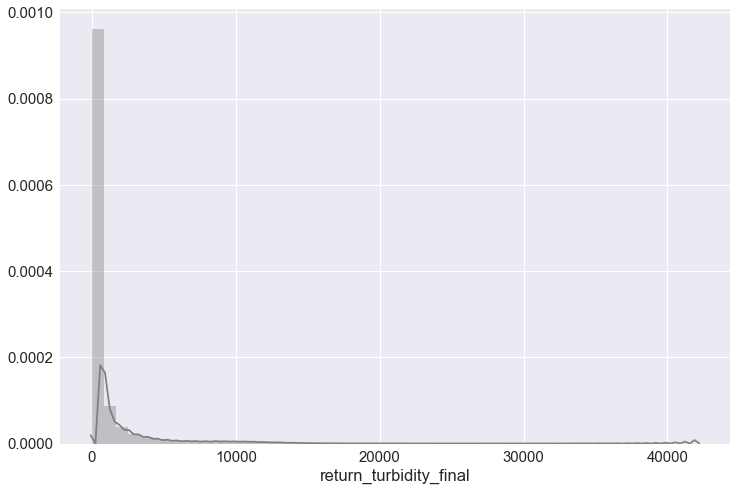

In [138]:
g = sns.distplot(df_new_1['return_turbidity_final'],color="gray")

# Run the model

In [ ]:
#Y varaible is continuous variable, so we have used the below models -
# Linear Regression
# Lasso Regression
# Ridge Regression
# ELastic net Regularization
# Randomforest Regressor
# XGBoost

# Linear Regression Model

In [139]:
#import the library to run Linear Regression
# Packages for checking assumptions
from scipy import stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
import statsmodels.formula.api as sm


In [140]:
#convert phase from text to dummy variables data
phase_dummies1 = pd.get_dummies(df_new_1['phase'])
phase_dummies2 = pd.get_dummies(df_new_1['pipeline'])

In [141]:
#concatenate the newly formed cols with the existing dataset
df_with_dummies = pd.concat([df_new_1, phase_dummies1], axis=1)
df_with_dummies2 = pd.concat([df_with_dummies, phase_dummies2], axis=1)

In [142]:
df_with_dummies2.head()

,row_id,process_id,object_id,phase,timestamp,pipeline,supply_flow,supply_pressure,return_temperature,return_conductivity,return_turbidity,return_flow,supply_pump,supply_pre_rinse,supply_caustic,return_caustic,supply_acid,return_acid,supply_clean_water,return_recovery_water,return_drain,object_low_level,tank_level_pre_rinse,tank_level_caustic,tank_level_acid,tank_level_clean_water,tank_temperature_pre_rinse,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_caustic,tank_lsh_acid,tank_lsh_clean_water,tank_lsh_pre_rinse,target_time_period,result,return_turbidity_final,acid,caustic,intermediate_rinse,pre_rinse,L1,L10,L11,L12,L2,L3,L4,L6,L7,L8,L9
1,2839129,23875,965,intermediate_rinse,2018-04-07 06:41:14,L11,217.013900,-0.037109,75.629340,37.853770,0.506374,32389.3200,False,False,False,True,False,False,False,False,False,False,50.971680,39.971424,42.639793,45.284650,29.152199,82.23741,72.76837,45.257640,45.718307,False,0.0,False,0.0,False,11111,16401.119223,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,817088,21094,966,acid,2018-03-13 21:43:42,L11,-14.467592,-0.037109,20.468027,6.955707,0.062886,5510.3447,False,False,False,False,False,False,False,False,True,False,56.007484,42.082610,44.847366,48.884003,26.873552,81.65871,73.31814,45.328133,44.564790,True,0.0,False,0.0,False,00011,346.524206,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,5888866,27868,924,caustic,2018-03-15 14:41:17,L7,43185.766000,0.161458,81.181280,43.958060,0.087705,21265.5530,True,False,True,True,False,False,False,False,False,False,51.719290,41.440792,46.775177,40.693180,29.354746,82.61719,72.62731,45.173767,43.949566,False,0.0,False,0.0,False,11111,1865.093033,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5313508,27123,955,acid,2018-04-23 05:18:39,L10,6770.833500,-0.114149,65.158424,43.138640,0.008928,5725.5500,True,False,False,False,True,True,False,False,False,False,53.774050,41.560690,44.816803,44.283130,30.244503,82.71846,72.36690,45.611618,44.521988,False,0.0,False,0.0,False,11111,51.115507,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,3847238,25166,306,acid,2018-03-24 02:48:56,L3,29398.150000,2.312934,70.091866,3.174084,0.004214,31637.0060,True,False,False,False,True,False,False,True,False,False,50.757740,40.869503,41.617115,42.087310,30.009403,82.29890,73.05411,45.032570,44.380570,False,0.0,False,0.0,False,11111,133.313104,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# instead of repeating the code, we can select the phase here

In [370]:
#df_train = df_with_dummies2.loc[df_with_dummies2['pre_rinse'] == 1]
#df_train = df_with_dummies2.loc[df_with_dummies2['acid'] == 1]
#df_train = df_with_dummies2.loc[df_with_dummies2['intermediate_rinse'] == 1]
df_train = df_with_dummies2.loc[df_with_dummies2['caustic'] == 1]
df_train.head()

,row_id,process_id,object_id,phase,timestamp,pipeline,supply_flow,supply_pressure,return_temperature,return_conductivity,return_turbidity,return_flow,supply_pump,supply_pre_rinse,supply_caustic,return_caustic,supply_acid,return_acid,supply_clean_water,return_recovery_water,return_drain,object_low_level,tank_level_pre_rinse,tank_level_caustic,tank_level_acid,tank_level_clean_water,tank_temperature_pre_rinse,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_caustic,tank_lsh_acid,tank_lsh_clean_water,tank_lsh_pre_rinse,target_time_period,result,return_turbidity_final,acid,caustic,intermediate_rinse,pre_rinse,L1,L10,L11,L12,L2,L3,L4,L6,L7,L8,L9
3,5888866,27868,924,caustic,2018-03-15 14:41:17,L7,43185.766,0.161458,81.18128,43.958060,0.087705,21265.553,True,False,True,True,False,False,False,False,False,False,51.719290,41.440792,46.775177,40.693180,29.354746,82.617190,72.62731,45.173767,43.949566,False,0.0,False,0.0,False,11111,1865.093033,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8,1573935,22119,300,caustic,2018-03-28 07:28:42,L3,30049.191,1.914713,75.92231,41.441803,0.378781,32508.678,True,False,True,True,False,False,False,False,False,False,56.047455,36.536640,40.822480,46.824547,27.264177,82.197624,72.71412,45.289740,44.827694,True,0.0,False,0.0,False,11001,12313.664220,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
15,5774538,27726,405,caustic,2018-04-20 17:49:11,L4,55515.773,1.799479,81.79977,43.565804,0.036496,55128.758,True,False,True,True,False,False,False,False,False,False,51.380753,38.929943,47.113716,46.509510,31.604458,82.667820,72.77199,46.555206,44.107452,False,0.0,False,0.0,False,11111,2011.984260,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
17,2466625,23326,109,caustic,2018-03-20 21:35:34,L1,25205.441,3.176432,81.75636,44.848347,0.012284,24742.477,True,False,True,True,False,False,False,False,False,True,50.830620,37.129086,41.638275,44.635777,30.117910,81.723816,72.42839,45.126232,44.567610,False,0.0,False,0.0,False,11111,303.946437,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
21,5059902,26798,950,caustic,2018-04-08 16:21:52,L10,31539.350,0.388889,81.38020,44.483112,0.023533,31577.328,True,False,True,True,False,False,False,False,False,False,57.058380,40.490997,42.790253,44.245514,27.542680,82.186775,72.77199,46.143875,45.025097,False,0.0,False,0.0,False,11111,743.115320,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [371]:
# Randomly sample 30% of your dataframe
#df_train = df_train.sample(n=80000)

In [372]:
df_train.head()

,row_id,process_id,object_id,phase,timestamp,pipeline,supply_flow,supply_pressure,return_temperature,return_conductivity,return_turbidity,return_flow,supply_pump,supply_pre_rinse,supply_caustic,return_caustic,supply_acid,return_acid,supply_clean_water,return_recovery_water,return_drain,object_low_level,tank_level_pre_rinse,tank_level_caustic,tank_level_acid,tank_level_clean_water,tank_temperature_pre_rinse,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_caustic,tank_lsh_acid,tank_lsh_clean_water,tank_lsh_pre_rinse,target_time_period,result,return_turbidity_final,acid,caustic,intermediate_rinse,pre_rinse,L1,L10,L11,L12,L2,L3,L4,L6,L7,L8,L9
3,5888866,27868,924,caustic,2018-03-15 14:41:17,L7,43185.766,0.161458,81.18128,43.958060,0.087705,21265.553,True,False,True,True,False,False,False,False,False,False,51.719290,41.440792,46.775177,40.693180,29.354746,82.617190,72.62731,45.173767,43.949566,False,0.0,False,0.0,False,11111,1865.093033,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8,1573935,22119,300,caustic,2018-03-28 07:28:42,L3,30049.191,1.914713,75.92231,41.441803,0.378781,32508.678,True,False,True,True,False,False,False,False,False,False,56.047455,36.536640,40.822480,46.824547,27.264177,82.197624,72.71412,45.289740,44.827694,True,0.0,False,0.0,False,11001,12313.664220,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
15,5774538,27726,405,caustic,2018-04-20 17:49:11,L4,55515.773,1.799479,81.79977,43.565804,0.036496,55128.758,True,False,True,True,False,False,False,False,False,False,51.380753,38.929943,47.113716,46.509510,31.604458,82.667820,72.77199,46.555206,44.107452,False,0.0,False,0.0,False,11111,2011.984260,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
17,2466625,23326,109,caustic,2018-03-20 21:35:34,L1,25205.441,3.176432,81.75636,44.848347,0.012284,24742.477,True,False,True,True,False,False,False,False,False,True,50.830620,37.129086,41.638275,44.635777,30.117910,81.723816,72.42839,45.126232,44.567610,False,0.0,False,0.0,False,11111,303.946437,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
21,5059902,26798,950,caustic,2018-04-08 16:21:52,L10,31539.350,0.388889,81.38020,44.483112,0.023533,31577.328,True,False,True,True,False,False,False,False,False,False,57.058380,40.490997,42.790253,44.245514,27.542680,82.186775,72.77199,46.143875,45.025097,False,0.0,False,0.0,False,11111,743.115320,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [373]:
# Define our dependent variable
y_column = 'return_turbidity_final'
y_train = df_train[y_column]

# Define our independent variables
x_columns = ['process_id',
             'supply_flow','supply_pressure','return_flow','return_turbidity','object_id',
             'return_temperature','return_conductivity',
             'tank_level_pre_rinse','tank_level_caustic','tank_level_acid','tank_level_clean_water',
             'tank_temperature_pre_rinse','tank_temperature_acid',
              'acid', 'caustic', 'intermediate_rinse',
             'pre_rinse'
            ]
X_train = df_train[x_columns]

# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X_train['intercept'] = 1


C:\Users\Meetu\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [374]:
model = sm.OLS(endog=y_train, exog=X_train)
model_fit = model.fit()
print(model_fit.summary())

                              OLS Regression Results                              
Dep. Variable:     return_turbidity_final   R-squared:                       0.799
Model:                                OLS   Adj. R-squared:                  0.799
Method:                     Least Squares   F-statistic:                 6.515e+04
Date:                    Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                            23:07:20   Log-Likelihood:            -1.9469e+06
No. Observations:                  229862   AIC:                         3.894e+06
Df Residuals:                      229847   BIC:                         3.894e+06
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

C:\Users\Meetu\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\Meetu\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Meetu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Meetu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Meetu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [375]:
#this is test dataset in which we are adding comuted column, corresponding to Y variable
test_df['return_flow'] = test_df['return_flow'].astype(float)

In [376]:
test_df['return_flow'] = np.where(test_df['return_flow'] < 0, 0,test_df['return_flow'])

In [377]:
#creating computed column 'return_turbidity_final'
test_df['return_turbidity_final'] =  test_df['return_flow'] * test_df['return_turbidity']

In [378]:
test_df.head()

,row_id,process_id,object_id,phase,timestamp,pipeline,supply_flow,supply_pressure,return_temperature,return_conductivity,return_turbidity,return_flow,supply_pump,supply_pre_rinse,supply_caustic,return_caustic,supply_acid,return_acid,supply_clean_water,return_recovery_water,return_drain,object_low_level,tank_level_pre_rinse,tank_level_caustic,tank_level_acid,tank_level_clean_water,tank_temperature_pre_rinse,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_caustic,tank_lsh_acid,tank_lsh_clean_water,tank_lsh_pre_rinse,target_time_period,return_turbidity_final
708213,708213,22890,964,caustic,2018-04-30 20:03:26,L11,29616.970,-0.037109,78.956890,43.604960,13.527200,24688.9470,True,False,True,True,False,False,False,False,False,False,48.136390,43.417970,45.651400,48.705334,30.624277,82.497826,72.605610,45.323620,44.439884,False,0.0,False,0.0,False,3.339723e+05
1711957,1711957,27206,955,acid,2018-05-24 04:55:35,L10,6727.430,-0.114149,69.386570,44.089195,0.430411,4456.0186,True,False,False,False,True,True,False,False,False,False,58.160988,43.850550,44.908493,41.607710,29.926216,83.004196,72.298170,45.499960,44.575080,True,0.0,False,0.0,False,1.917919e+03
1265187,1265187,25295,962,caustic,2018-05-15 08:39:10,L11,30065.465,-0.037109,79.846640,41.427685,36.606625,27399.8100,True,False,True,True,False,False,False,False,False,False,56.042755,45.108326,43.107635,49.683340,31.911892,82.316986,72.688800,46.054264,44.364110,False,0.0,False,0.0,False,1.003015e+06
882931,882931,23590,933,caustic,2018-05-01 13:22:14,L8,22019.676,0.157552,77.835650,55.341720,0.235098,15625.0000,True,False,True,True,False,False,False,False,False,False,53.174550,41.758175,42.099068,45.938220,29.727285,82.313370,72.616460,45.510180,44.996563,False,0.0,False,0.0,False,3.673412e+03
661360,661360,22727,306,pre_rinse,2018-04-28 22:41:36,L3,34100.117,2.810113,33.355034,1.715545,0.133825,30787.0350,True,True,False,False,False,False,False,False,True,False,50.696617,45.686670,48.063510,48.931026,31.901041,82.497826,72.464554,45.530150,44.847107,False,0.0,False,0.0,False,4.120082e+03


In [379]:
#convert phase from text to dummy variables data
test_phase_dummies1 = pd.get_dummies(test_df['phase'])
test_phase_dummies2 = pd.get_dummies(test_df['pipeline'])

In [380]:
#concatenate the newly formed cols with the existing dataset
test_df_with_dummies = pd.concat([test_df, test_phase_dummies1], axis=1)
test_df_with_dummies2 = pd.concat([test_df_with_dummies, test_phase_dummies2], axis=1)

In [381]:
#test_df_test = test_df_with_dummies2.loc[test_df_with_dummies2['pre_rinse'] == 1]
#test_df_test = test_df_with_dummies2.loc[test_df_with_dummies2['intermediate_rinse'] == 1]
#test_df_test = test_df_with_dummies2.loc[test_df_with_dummies2['acid'] == 1]
test_df_test = test_df_with_dummies2.loc[test_df_with_dummies2['caustic'] == 1]


In [382]:
# Define our dependent variable
y_column = 'return_turbidity_final'
y_test = test_df_test[y_column]

# Define our independent variables
x_columns = ['process_id',
             'supply_flow','supply_pressure','return_flow','return_turbidity','object_id',
             'return_temperature','return_conductivity',
             'tank_level_pre_rinse','tank_level_caustic','tank_level_acid','tank_level_clean_water',
             'tank_temperature_pre_rinse','tank_temperature_acid',
              'acid', 'caustic', 'intermediate_rinse',
             'pre_rinse'
            ]
X_test = test_df_test[x_columns]

# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X_test['intercept'] = 1

C:\Users\Meetu\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [383]:
#prediction on test data
y_pred_test = model_fit.predict(X_test)

In [384]:
#print(y_pred_test)

In [385]:
# Evaluate model performance on test data using Root Mean Squared Error(RMSE) and R-squared
from sklearn.metrics import mean_squared_error as mse, r2_score
rmse = np.sqrt(mse(y_test,y_pred_test))
r2 = r2_score(y_test,y_pred_test)
print('Root Mean Squared error on test data: ' + str(rmse))
print('R-square on test data: ' + str(r2))

Root Mean Squared error on test data: 140369.36857439743
R-square on test data: 0.7477051604883473


# XGBoost Model

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
import xgboost as xgb
import lightgbm as lgb
import warnings

model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1)

RMSE(model_xgb,X_train,Y_train)#0.128

# Elastic Regularization

In [386]:
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV

In [387]:
#the elastic net is a regularized regression method that 
#linearly combines the L1 and L2 penalties of the lasso and ridge methods.
#Running Elastic net regression model on train data
elasticnetcv = ElasticNetCV(eps=1e-15)
model_elastic = elasticnetcv.fit(X_train,y_train)

C:\Users\Meetu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [388]:
print("Elastic Regularization R-Square value is = " +str(model_elastic.score(X_train,y_train)))

Elastic Regularization R-Square value is = 0.7987200039367163


In [389]:
#Prediction on test data
y_pred_test = model_elastic.predict(X_test)

In [390]:
rmse = np.sqrt(mse(y_test,y_pred_test))
print("RMSE for Elastic Regularization is = " + str(rmse))
print("R-square value for elastic regularization on test data is " + str(r2_score(y_test,y_pred_test)))

RMSE for Elastic Regularization is = 140369.4095208214
R-square value for elastic regularization on test data is 0.7477050132970751


# Lasso Regression 

In [391]:
#Lasso regression is a type of linear regression that uses shrinkage. 
#Shrinkage is where data values are shrunk towards a central point, like the mean. 
#Running Lasso regression model on train data
lassocv = LassoCV(eps=1e-8)
model_lasso = lassocv.fit(X_train,y_train)
print("Lasso Regression R-Square value is = " + str(model_lasso.score(X_train,y_train)))

Lasso Regression R-Square value is = 0.7987195812017351


In [392]:
#Prediction on test data
y_pred_test = model_lasso.predict(X_test)

In [393]:
rmse = np.sqrt(mse(y_test,y_pred_test))
print("RMSE for Lasso Regression is = " + str(rmse))
print("R-square value for Lasso Regression on test data is " + str(r2_score(y_test,y_pred_test)))

RMSE for Lasso Regression is = 140385.72003343355
R-square value for Lasso Regression on test data is 0.7476463780195512


# Ridge Regression

In [394]:
#for multiple regression data that suffer from multicollinearity
#Model fit on train data
ridge = Ridge(alpha=1e-6)
model_ridge = ridge.fit(X_train,y_train)
print("Ridge Regression R-Square value is = " +str(model_ridge.score(X_train,y_train)))

Ridge Regression R-Square value is = 0.7987200039392757


C:\Users\Meetu\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.028498e-21
  overwrite_a=True).T


In [395]:
#Prediction on test data
y_pred_test = model_ridge.predict(X_test)

In [396]:
rmse = np.sqrt(mse(y_test,y_pred_test))
print("RMSE for Ridge Regression is = " + str(rmse))
print("R-square value for Ridge Regression on test data is " + str(r2_score(y_test,y_pred_test)))

RMSE for Ridge Regression is = 140369.3685872555
R-square value for Ridge Regression on test data is 0.7477051604421261


# Randomforest Regressor

In [397]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 600 decision trees
rf = RandomForestRegressor(n_estimators = 600, random_state = 32)
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
from sklearn import metrics

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors_1 = abs(predictions - y_test)
errors = np.sqrt(metrics.mean_squared_error(predictions,y_test))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_1), 2))
print('RMSE Error:', round(np.mean(errors), 2))

# Feature Importance

In [311]:
rf.feature_importances_

array([1.05923729e-04, 9.85993082e-05, 1.06880084e-04, 2.28864380e-01,
       7.69939920e-01, 9.85503232e-05, 6.14067189e-05, 1.50759973e-04,
       1.31848537e-04, 9.61620224e-05, 1.07685301e-04, 9.50994534e-05,
       6.47105336e-05, 7.80737127e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])